In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from copy import deepcopy
%matplotlib inline

In [2]:
# Importing main data
def import_main_data() -> dict:
    path = Path("../main_data")
    all_seasons = os.listdir(path)
    dct = {}
    for season in all_seasons:
        new_path = os.path.join(path, f'{season}')
        #print(new_path)
        dct[season] = pd.read_csv(new_path)   
    return dct

In [3]:
# Importing xG datasets
def import_xG_data() -> dict:
    path = Path("../data")
    years = [2015, 2016, 2017, 2018, 2019, 2020]
    all_seasons = os.listdir(path)
    all_teams = []
    dct = {}
    cnt = 0

    for season in all_seasons:
        new_path = os.path.join(path,"season_" f'{years[cnt]}')
        #print(new_path)
        all_teams = os.listdir(new_path)

        for team in all_teams:
            path_to_file = os.path.join(new_path, f'{team}')
            #print(path_to_file)
            dct[team] = pd.read_csv(path_to_file, index_col=0)

        cnt+=1
    
    return dct

In [4]:
# Preprocessing main data
def clear_data(data: dict) -> dict:
    data_ = deepcopy(data)
    for key in data_:
        data_[key] = data_[key].loc[:, 'Date':'AR'].drop(['Referee','Time'], axis = 1, errors = 'ignore').reset_index(drop = True)
        data_[key]['Date'] = pd.to_datetime(data_[key]['Date'], dayfirst = True) 
        
        #print(data_[key])
    return data_

In [5]:
season_1516_teams_names_map = {'Arsenal' : 'Arsenal', 'Aston Villa' : 'Aston Villa', 'Bournemouth' : 'Bournemouth',
                               'Chelsea' : 'Chelsea', 'Crystal Palace' : 'Crystal Palace', 'Everton' : 'Everton',
                               'Leicester' : 'Leicester', 'Liverpool' : 'Liverpool', 'Manchester City' : 'Man City',
                               'Manchester United' : 'Man United', 'Newcastle United' : 'Newcastle', 'Norwich' : 'Norwich',
                               'Southampton' : 'Southampton', 'Stoke' : 'Stoke', 'Sunderland' : 'Sunderland',
                               'Swansea' : 'Swansea', 'Tottenham' : 'Tottenham', 'Watford' : 'Watford', 
                               'West Bromwich Albion' : 'West Brom', 'West Ham' : 'West Ham'}

season_1617_teams_names_map = {'Arsenal' : 'Arsenal',  'Bournemouth' : 'Bournemouth', 'Burnley' : 'Burnley', 
                               'Chelsea' : 'Chelsea', 'Crystal Palace' : 'Crystal Palace', 'Everton' : 'Everton',
                               'Leicester' : 'Leicester', 'Liverpool' : 'Liverpool', 'Manchester City' : 'Man City',
                               'Manchester United' : 'Man United',  'Middlesbrough' : 'Middlesbrough',
                               'Southampton' : 'Southampton', 'Stoke' : 'Stoke', 'Sunderland' : 'Sunderland',
                               'Swansea' : 'Swansea', 'Tottenham' : 'Tottenham', 'Watford' : 'Watford', 
                               'West Bromwich Albion' : 'West Brom', 'West Ham' : 'West Ham',  'Hull' : 'Hull'}

season_1718_teams_names_map = {'Arsenal' : 'Arsenal',  'Bournemouth' : 'Bournemouth', 'Burnley' : 'Burnley',
                               'Chelsea' : 'Chelsea', 'Crystal Palace' : 'Crystal Palace', 'Everton' : 'Everton',
                               'Leicester' : 'Leicester', 'Liverpool' : 'Liverpool', 'Manchester City' : 'Man City',
                               'Manchester United' : 'Man United',  'Newcastle United' : 'Newcastle', 'Brighton' : 'Brighton',
                               'Southampton' : 'Southampton', 'Stoke' : 'Stoke',  'Huddersfield' : 'Huddersfield',
                               'Swansea' : 'Swansea', 'Tottenham' : 'Tottenham', 'Watford' : 'Watford', 
                               'West Bromwich Albion' : 'West Brom', 'West Ham' : 'West Ham'}

season_1819_teams_names_map = {'Arsenal' : 'Arsenal',  'Bournemouth' : 'Bournemouth', 'Burnley' : 'Burnley',
                               'Chelsea' : 'Chelsea', 'Crystal Palace' : 'Crystal Palace', 'Everton' : 'Everton',
                               'Leicester' : 'Leicester', 'Liverpool' : 'Liverpool', 'Manchester City' : 'Man City',
                               'Manchester United' : 'Man United',  'Newcastle United' : 'Newcastle', 'Brighton' : 'Brighton',
                               'Southampton' : 'Southampton', 'Cardiff' : 'Cardiff',  'Huddersfield' : 'Huddersfield',
                               'Fulham' : 'Fulham', 'Tottenham' : 'Tottenham', 'Watford' : 'Watford', 
                               'Wolverhampton Wanderers' : 'Wolves', 'West Ham' : 'West Ham'}

season_1920_teams_names_map = {'Arsenal' : 'Arsenal',  'Bournemouth' : 'Bournemouth', 'Burnley' : 'Burnley',
                               'Chelsea' : 'Chelsea', 'Crystal Palace' : 'Crystal Palace', 'Everton' : 'Everton',
                               'Leicester' : 'Leicester', 'Liverpool' : 'Liverpool', 'Manchester City' : 'Man City',
                               'Manchester United' : 'Man United',  'Newcastle United' : 'Newcastle', 'Brighton' : 'Brighton',
                               'Southampton' : 'Southampton', 'Norwich' : 'Norwich',  'Sheffield United' : 'Sheffield United',
                               'Aston Villa' : 'Aston Villa', 'Tottenham' : 'Tottenham', 'Watford' : 'Watford', 
                               'Wolverhampton Wanderers' : 'Wolves', 'West Ham' : 'West Ham'}

season_2021_teams_names_map = {'Arsenal' : 'Arsenal',  'Burnley' : 'Burnley', 'Chelsea' : 'Chelsea', 
                               'Crystal Palace' : 'Crystal Palace', 'Everton' : 'Everton', 'Fulham' : 'Fulham', 'Leeds' : 'Leeds',
                               'Leicester' : 'Leicester', 'Liverpool' : 'Liverpool', 'Manchester City' : 'Man City',
                               'Manchester United' : 'Man United',  'Newcastle United' : 'Newcastle', 'Brighton' : 'Brighton',
                               'Southampton' : 'Southampton', 'Norwich' : 'Norwich',  'Sheffield United' : 'Sheffield United',
                               'Aston Villa' : 'Aston Villa', 'Tottenham' : 'Tottenham', 'Watford' : 'Watford', 
                               'Wolverhampton Wanderers' : 'Wolves', 'West Ham' : 'West Ham'}

season_map_list = [season_1516_teams_names_map, season_1617_teams_names_map, season_1718_teams_names_map,
                  season_1819_teams_names_map,season_1920_teams_names_map, season_2021_teams_names_map]

season_1516_teams_names_map = {'Arsenal' : 'ARS', 'Aston Villa' : 'AVA', 'Bournemouth' : 'BOU',
                               'Chelsea' : 'CHE', 'Crystal Palace' : 'CRY', 'Everton' : 'EVE',
                               'Leicester' : 'LEI', 'Liverpool' : 'LIV', 'Man City' : 'MCI',
                               'Man United' : 'MUN', 'Newcastle' : 'NEW', 'Norwich' : 'NOR',
                               'Southampton' : 'SOU', 'Stoke' : 'STO', 'Sunderland' : 'SUN',
                               'Swansea' : 'SWA', 'Tottenham' : 'TOT', 'Watford' : 'WAT', 
                               'West Brom' : 'WBA', 'West Ham' : 'WHU'}

season_1617_teams_names_map = {'Arsenal' : 'ARS',  'Bournemouth' : 'BOU', 'Burnley' : 'BUR',
                               'Chelsea' : 'CHE', 'Crystal Palace' : 'CRY', 'Everton' : 'EVE',
                               'Hull' : 'HUL','Leicester' : 'LEI', 'Liverpool' : 'LIV', 'Man City' : 'MCI',
                               'Man United' : 'MUN',  'Middlesbrough' : 'MID',
                               'Southampton' : 'SOU', 'Stoke' : 'STO', 'Sunderland' : 'SUN',
                               'Swansea' : 'SWA', 'Tottenham' : 'TOT', 'Watford' : 'WAT', 
                               'West Brom' : 'WBA', 'West Ham' : 'WHU'}

season_1718_teams_names_map = {'Arsenal' : 'ARS',  'Bournemouth' : 'BOU', 'Burnley' : 'BUR',
                               'Chelsea' : 'CHE', 'Crystal Palace' : 'CRY', 'Everton' : 'EVE',
                               'Leicester' : 'LEI', 'Liverpool' : 'LIV', 'Man City' : 'MCI',
                               'Man United' : 'MUN',  'Newcastle' : 'NEW', 'Brighton' : 'BRI',
                               'Southampton' : 'SOU', 'Stoke' : 'STO',  'Huddersfield' : 'HUD',
                               'Swansea' : 'SWA', 'Tottenham' : 'TOT', 'Watford' : 'WAT', 
                               'West Brom' : 'WBA', 'West Ham' : 'WHU'}

season_1819_teams_names_map = {'Arsenal' : 'ARS',  'Bournemouth' : 'BOU', 'Burnley' : 'BUR',
                               'Chelsea' : 'CHE', 'Crystal Palace' : 'CRY', 'Everton' : 'EVE',
                               'Leicester' : 'LEI', 'Liverpool' : 'LIV', 'Man City' : 'MCI',
                               'Man United' : 'MUN',  'Newcastle' : 'NEW', 'Brighton' : 'BRI',
                               'Southampton' : 'SOU', 'Cardiff' : 'CAR',  'Huddersfield' : 'HUD',
                               'Fulham' : 'FUL', 'Tottenham' : 'TOT', 'Watford' : 'WAT', 
                               'Wolves' : 'WLV', 'West Ham' : 'WHU'}

season_1920_teams_names_map = {'Arsenal' : 'ARS',  'Bournemouth' : 'BOU', 'Burnley' : 'BUR',
                               'Chelsea' : 'CHE', 'Crystal Palace' : 'CRY', 'Everton' : 'EVE',
                               'Leicester' : 'LEI', 'Liverpool' : 'LIV', 'Man City' : 'MCI',
                               'Man United' : 'MUN',  'Newcastle' : 'NEW', 'Brighton' : 'BRI',
                               'Southampton' : 'SOU', 'Norwich' : 'NOR',  'Sheffield United' : 'SHU',
                               'Aston Villa' : 'AVA', 'Tottenham' : 'TOT', 'Watford' : 'WAT', 
                               'Wolves' : 'WLV', 'West Ham' : 'WHU'}

season_2021_teams_names_map = {'Arsenal' : 'ARS', 'Burnley' : 'BUR', 'Leeds' : 'LEE', 'Fulham' : 'FUL',
                               'Chelsea' : 'CHE', 'Crystal Palace' : 'CRY', 'Everton' : 'EVE',
                               'Leicester' : 'LEI', 'Liverpool' : 'LIV', 'Man City' : 'MCI',
                               'Man United' : 'MUN',  'Newcastle' : 'NEW', 'Brighton' : 'BRI',
                               'Southampton' : 'SOU', 'Sheffield United' : 'SHU',
                               'Aston Villa' : 'AVA', 'Tottenham' : 'TOT',  'West Brom' : 'WBA',
                               'Wolves' : 'WLV', 'West Ham' : 'WHU'}

shortcut_map_list = [season_1516_teams_names_map, season_1617_teams_names_map ,season_1718_teams_names_map,
                  season_1819_teams_names_map, season_1920_teams_names_map, season_2021_teams_names_map]

In [6]:
# Merging datasets into one
def merge_datasets(dct: dict, data: dict, seasons_map: list, shortcuts: list) -> dict:
    dct_ = deepcopy(dct)
    idx = 0
    years = [2015, 2016, 2017, 2018, 2019, 2020]
    for key, value in dct_.items():
        if f'{years[idx]}' in key:
            value['home_team'] = value['home_team'].map(seasons_map[idx])
            value['away_team'] = value['away_team'].map(seasons_map[idx])
            continue
        else:
            idx += 1
            value['home_team'] = value['home_team'].map(season_map_list[idx])
            value['away_team'] = value['away_team'].map(season_map_list[idx])

    dct_['Man City_2015.csv'] = dct_.pop('Manchester City_2015.csv')
    dct_['Man City_2016.csv'] = dct_.pop('Manchester City_2016.csv')
    dct_['Man City_2017.csv'] = dct_.pop('Manchester City_2017.csv')
    dct_['Man City_2018.csv'] = dct_.pop('Manchester City_2018.csv')
    dct_['Man City_2019.csv'] = dct_.pop('Manchester City_2019.csv')
    dct_['Man City_2020.csv'] = dct_.pop('Manchester City_2020.csv')
    dct_['Man United_2015.csv'] = dct_.pop('Manchester United_2015.csv')
    dct_['Man United_2016.csv'] = dct_.pop('Manchester United_2016.csv')
    dct_['Man United_2017.csv'] = dct_.pop('Manchester United_2017.csv')
    dct_['Man United_2018.csv'] = dct_.pop('Manchester United_2018.csv')
    dct_['Man United_2019.csv'] = dct_.pop('Manchester United_2019.csv')
    dct_['Man United_2020.csv'] = dct_.pop('Manchester United_2020.csv')
    dct_['Newcastle_2015.csv'] = dct_.pop('Newcastle United_2015.csv')
    dct_['Newcastle_2017.csv'] = dct_.pop('Newcastle United_2017.csv')
    dct_['Newcastle_2018.csv'] = dct_.pop('Newcastle United_2018.csv')
    dct_['Newcastle_2019.csv'] = dct_.pop('Newcastle United_2019.csv')
    dct_['Newcastle_2020.csv'] = dct_.pop('Newcastle United_2020.csv')
    dct_['West Brom_2015.csv'] = dct_.pop('West Bromwich Albion_2015.csv')
    dct_['West Brom_2016.csv'] = dct_.pop('West Bromwich Albion_2016.csv')
    dct_['West Brom_2017.csv'] = dct_.pop('West Bromwich Albion_2017.csv')
    dct_['West Brom_2020.csv'] = dct_.pop('West Bromwich Albion_2020.csv')
    dct_['Wolves_2018.csv'] = dct_.pop('Wolverhampton Wanderers_2018.csv')
    dct_['Wolves_2019.csv'] = dct_.pop('Wolverhampton Wanderers_2019.csv')
    dct_['Wolves_2020.csv'] = dct_.pop('Wolverhampton Wanderers_2020.csv')

    lst_df = []
    idx = 0
    for key in data:
        lst = []
        for h_team in data[key]['HomeTeam'].sort_values().unique():
            df_sorted = data[key][data[key]['HomeTeam'] == h_team].sort_values(by = ['AwayTeam'])
            xG_home_away_df = dct_[f'{h_team}_{years[idx]}.csv'].sort_values(by = ['away_team']).iloc[:,2:]
            xG_home_away_df = xG_home_away_df.reset_index().drop('index', axis = 1)
            df_sorted = df_sorted.reset_index().drop('index', axis = 1)
            df_sorted['xG_home'] = xG_home_away_df['xG_home']
            df_sorted['xG_away'] = xG_home_away_df['xG_away']
            df_ = df_sorted.set_index('Date')
            lst.append(df_)
        idx += 1
        lst_df.append(lst)
        for i in range (idx):
            cleared_data[key] = pd.concat(lst_df[i]).sort_index()
           
    idx = 0
    for key in data:
        data[key]['HomeTeam'] = data[key]['HomeTeam'].map(shortcuts[idx])
        data[key]['AwayTeam'] = data[key]['AwayTeam'].map(shortcuts[idx])
        data[key] = data[key].reset_index(drop = True)
        idx += 1
    
    return data

In [7]:
# Working on data
main_data = import_main_data()
xG_data = import_xG_data()
cleared_data = clear_data(main_data)
merged = merge_datasets(xG_data, cleared_data, season_map_list, shortcut_map_list) 

In [8]:
merged['season_2020.csv'].info

<bound method DataFrame.info of    HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  ...  HF  AF  HC  \
0       LIV      LEE     4     3   H     3     2   H  22   6  ...   9   6   9   
1       WHU      NEW     0     2   A     0     0   D  15  15  ...  13   7   8   
2       CRY      SOU     1     0   H     1     0   H   5   9  ...  14  11   7   
3       FUL      ARS     0     3   A     0     1   A   5  13  ...  12  12   2   
4       WBA      LEI     0     3   A     0     0   D   7  13  ...  12   9   2   
5       TOT      EVE     0     1   A     0     0   D   9  15  ...  15   7   5   
6       BRI      CHE     1     3   A     0     1   A  13  10  ...   8  13   4   
7       SHU      WLV     0     2   A     0     2   A   9  11  ...  13   7  12   
8       MUN      CRY     1     3   A     0     1   A  13  14  ...  13  10   9   
9       LEE      FUL     4     3   H     2     1   H  10  14  ...  13  18   5   
10      ARS      WHU     2     1   H     1     1   D   7  14  ...  11  13   7

In [9]:
# Feature engineering
def calculate_home_team_power(dct: dict) -> list:  
    ht_power_in_each_season = []
    for key in dct:
        total = dct[key]['FTHG'].sum()
        matches = dct[key].shape[0] 
        ht_power_in_each_season.append(total/matches)
    return ht_power_in_each_season

def calculate_away_team_power(dct: dict) -> list:
    at_power_in_each_season = []
    for key in dct:
        total = dct[key]['FTAG'].sum()
        matches = dct[key].shape[0] 
        at_power_in_each_season.append(total/matches)
    return at_power_in_each_season    

In [10]:
# Training model for season 2015
raw_season_2015 = merged['season_2015.csv']
season_2015 = raw_season_2015.copy()

In [11]:
# Setting target column - need to be encoded
feature_names = ['D -> Draw', 'H -> HomeTeam', 'A -> AwayTeam']
season_2015.loc[season_2015['FTR'] == 'D', 'target'] = 0
season_2015.loc[season_2015['FTR'] == 'H', 'target'] = 1
season_2015.loc[season_2015['FTR'] == 'A', 'target'] = 2
season_2015.loc[season_2015['HTR'] == 'D', 'HTR'] = 0
season_2015.loc[season_2015['HTR'] == 'H', 'HTR'] = 1
season_2015.loc[season_2015['HTR'] == 'A', 'HTR'] = 2
season_2015['target'] = season_2015['target'].astype(np.int64)
season_2015['HTR'] = season_2015['HTR'].astype(np.int64)
season_2015['HomeTeam'] = season_2015['HomeTeam'].astype('category')
season_2015['AwayTeam'] = season_2015['AwayTeam'].astype('category')
season_2015 = season_2015.drop(['FTR'], axis = 1)
season_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   HomeTeam  380 non-null    category
 1   AwayTeam  380 non-null    category
 2   FTHG      380 non-null    int64   
 3   FTAG      380 non-null    int64   
 4   HTHG      380 non-null    int64   
 5   HTAG      380 non-null    int64   
 6   HTR       380 non-null    int64   
 7   HS        380 non-null    int64   
 8   AS        380 non-null    int64   
 9   HST       380 non-null    int64   
 10  AST       380 non-null    int64   
 11  HF        380 non-null    int64   
 12  AF        380 non-null    int64   
 13  HC        380 non-null    int64   
 14  AC        380 non-null    int64   
 15  HY        380 non-null    int64   
 16  AY        380 non-null    int64   
 17  HR        380 non-null    int64   
 18  AR        380 non-null    int64   
 19  xG_home   380 non-null    float64 
 20  xG_away   

In [32]:
# We are working on one season (2015) - there are 38 rounds - 10 games in every round. 
# Vector X_train - last 18 (var - train_interval) games between teamA and teamB (round 1-18 of sesason 2015)
# Y_train - the result of game between teamA and teamB (round 19 of season 2015). 
# X_test - last 18 (var - train_interval) games between TeamC and teamD (round 20 - 37 of season 2015)
# Y_test - the result of game between teamC and teamD (round 38 of season 2015)

# train_interval = 18
# games_per_round = 10

def train_and_predict(train_interval, games_per_round=10):
    # initialize X, Y 
    X_TRAIN = np.zeros((games_per_round, 116*train_interval))
    Y_TRAIN = np.zeros((games_per_round, 1))
    X_TEST = np.zeros((games_per_round, 116*train_interval))
    Y_TEST = np.zeros((games_per_round, 1))
    
    # adding data from dataset to X, Y
    for i in range(games_per_round):
    
        Y_train = season_2015.iloc[train_interval*games_per_round+i, -1:]
        teamA = season_2015.iloc[train_interval*games_per_round+i]['HomeTeam']
        teamB = season_2015.iloc[train_interval*games_per_round+i]['AwayTeam']

        Y_test = season_2015.iloc[2*train_interval*games_per_round+games_per_round+i, -1:]
        teamC = season_2015.iloc[2*train_interval*games_per_round+games_per_round+i]['HomeTeam']
        teamD = season_2015.iloc[2*train_interval*games_per_round+games_per_round+i]['AwayTeam']

        X_train = season_2015.iloc[0:train_interval*games_per_round, :]
        X_train = X_train.loc[(X_train['HomeTeam'] == teamA) | (X_train['HomeTeam'] == teamB) | (X_train['AwayTeam'] == teamA) | (X_train['AwayTeam'] == teamB)]
        X_train_enc = pd.get_dummies(X_train, drop_first = True, columns = ['HomeTeam', 'AwayTeam']).to_numpy()
#         print(f"teamA: {teamA}, teamB: {teamB}, X_train shape: {X_train_enc.shape}, iteration: {i}")
        X_train_enc = np.reshape(X_train_enc, (1, 116*train_interval))[0]

        X_test = season_2015.iloc[train_interval*games_per_round+games_per_round:2*train_interval*games_per_round+games_per_round, :]
        X_test = X_test.loc[(X_test['HomeTeam'] == teamC) | (X_test['HomeTeam'] == teamD) | (X_test['AwayTeam'] == teamC) | (X_test['AwayTeam'] == teamD)]
        X_test_enc = pd.get_dummies(X_test, drop_first = True, columns = ['HomeTeam', 'AwayTeam']).to_numpy()
#         print(f"teamC: {teamC}, teamD: {teamD}, X_test shape: {X_test_enc.shape}, iteration: {i}")
        X_test_enc = np.reshape(X_test_enc, (1, 116*train_interval))[0]

        X_TRAIN[i] = X_train_enc
        Y_TRAIN[i] = Y_train

        X_TEST[i] = X_test_enc
        Y_TEST[i] = Y_test

    print(f"X_TRAIN SHAPE IS: {X_TRAIN.shape}")
    print(f"Y_TRAIN SHAPE IS: {Y_TRAIN.shape}")

    print(f"X_TEST SHAPE IS: {X_TEST.shape}")
    print(f"Y_TEST SHAPE IS: {Y_TEST.shape}")

    # Data need to be standarized
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_TRAIN)
    X_test_std = scaler.transform(X_TEST)
    Y_TRAIN = np.ravel(Y_TRAIN)
    Y_TEST = np.ravel(Y_TEST)
    
    # support vector classifier - SVC
    # find best model using GridSearchCV
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC
    svc_classifier = SVC()
    param_grid = {'C' : [0.05, 0.1, 0.3, 0.5, 1], 'kernel' : ['rbf', 'sigmoid', 'linear']}

    grid_search = GridSearchCV(svc_classifier, param_grid, cv = 3, n_jobs = -1)
    grid_search.fit(X_train_std, Y_TRAIN)
    
    print(f"Model's best params: {grid_search.best_params_}")
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test_std)
    
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(Y_TEST, y_pred)
    print(f"Model's accuracy: {acc}")
    
    print(f"Y_TEST: {Y_TEST}")
    print(f"y_pred: {y_pred}")
    
    return acc

In [37]:
accuracies = []
max_train_interval = 18
train_intervals = [x for x in range(1, max_train_interval+1)]
rounds = train_intervals[:]

for train_interval_ in train_intervals:
    try:
        acc = train_and_predict(train_interval_)
        accuracies.append(acc)
    except:
        # deleting this round from rounds
        rounds.remove(train_interval_)
        print(f"there was a match delayed in {train_interval_} round")


X_TRAIN SHAPE IS: (10, 116)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 116)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 0.05, 'kernel': 'rbf'}
Model's accuracy: 0.4
Y_TEST: [2. 0. 0. 1. 0. 2. 2. 2. 1. 1.]
y_pred: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
X_TRAIN SHAPE IS: (10, 232)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 232)
Y_TEST SHAPE IS: (10, 1)


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Model's best params: {'C': 0.05, 'kernel': 'rbf'}
Model's accuracy: 0.3
Y_TEST: [1. 2. 2. 0. 0. 2. 1. 0. 1. 2.]
y_pred: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X_TRAIN SHAPE IS: (10, 348)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 348)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 0.05, 'kernel': 'linear'}
Model's accuracy: 0.2
Y_TEST: [2. 1. 2. 0. 1. 0. 2. 1. 0. 0.]
y_pred: [0. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
X_TRAIN SHAPE IS: (10, 464)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 464)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 0.05, 'kernel': 'rbf'}


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Model's accuracy: 0.4
Y_TEST: [2. 1. 2. 1. 1. 2. 0. 1. 0. 2.]
y_pred: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_TRAIN SHAPE IS: (10, 580)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 580)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 0.05, 'kernel': 'rbf'}
Model's accuracy: 0.3
Y_TEST: [1. 0. 1. 1. 2. 2. 1. 0. 0. 2.]
y_pred: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
X_TRAIN SHAPE IS: (10, 696)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 696)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 0.05, 'kernel': 'rbf'}


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Model's accuracy: 0.4
Y_TEST: [1. 1. 0. 0. 1. 2. 0. 0. 1. 0.]
y_pred: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_TRAIN SHAPE IS: (10, 812)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 812)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 1, 'kernel': 'sigmoid'}
Model's accuracy: 0.4
Y_TEST: [0. 2. 1. 1. 1. 0. 2. 2. 0. 1.]
y_pred: [0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
X_TRAIN SHAPE IS: (10, 928)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 928)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 0.05, 'kernel': 'rbf'}


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Model's accuracy: 0.2
Y_TEST: [1. 0. 2. 1. 1. 1. 0. 1. 0. 1.]
y_pred: [2. 1. 1. 2. 1. 1. 1. 2. 1. 2.]
X_TRAIN SHAPE IS: (10, 1044)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 1044)
Y_TEST SHAPE IS: (10, 1)


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Model's best params: {'C': 0.05, 'kernel': 'linear'}
Model's accuracy: 0.4
Y_TEST: [1. 1. 1. 0. 2. 1. 1. 1. 2. 0.]
y_pred: [2. 1. 2. 2. 2. 1. 2. 2. 2. 1.]
X_TRAIN SHAPE IS: (10, 1160)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 1160)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 0.05, 'kernel': 'rbf'}


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Model's accuracy: 0.6
Y_TEST: [1. 0. 1. 1. 1. 1. 0. 0. 2. 1.]
y_pred: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
there was a match delayed in 11 round
X_TRAIN SHAPE IS: (10, 1392)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 1392)
Y_TEST SHAPE IS: (10, 1)


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Model's best params: {'C': 0.05, 'kernel': 'rbf'}
Model's accuracy: 0.6
Y_TEST: [1. 1. 2. 2. 0. 2. 2. 1. 2. 2.]
y_pred: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
there was a match delayed in 13 round
there was a match delayed in 14 round
there was a match delayed in 15 round
there was a match delayed in 16 round
there was a match delayed in 17 round
X_TRAIN SHAPE IS: (10, 2088)
Y_TRAIN SHAPE IS: (10, 1)
X_TEST SHAPE IS: (10, 2088)
Y_TEST SHAPE IS: (10, 1)
Model's best params: {'C': 0.05, 'kernel': 'rbf'}
Model's accuracy: 0.6
Y_TEST: [1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
y_pred: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 0, 'rounds_no')

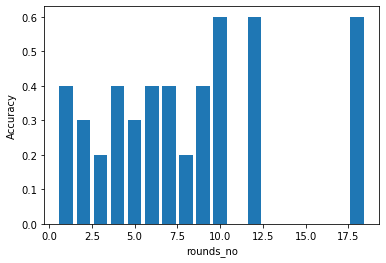

In [55]:
import matplotlib.pyplot as plt

plt.bar(rounds, height=accuracies)
plt.ylabel('Accuracy')
plt.xlabel('rounds_no')